In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from lab_utils_common import dlc
from lab_coffee_utils import load_coffee_data, plt_roast, plt_prob, plt_layer, plt_network, plt_output_unit
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [2]:
X,Y = load_coffee_data();
print(X.shape, Y.shape)

(200, 2) (200, 1)


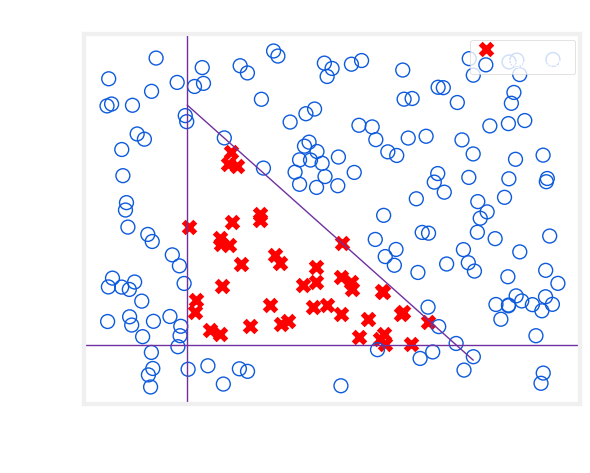

In [3]:
plt_roast(X,Y)

In [4]:
print(f"Temperature Max, Min pre normalization: {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}")
print(f"Duration    Max, Min pre normalization: {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}")
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)  # learns mean, variance
Xn = norm_l(X)
print(f"Temperature Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

Temperature Max, Min pre normalization: 284.99, 151.32
Duration    Max, Min pre normalization: 15.45, 11.51
Temperature Max, Min post normalization: 1.66, -1.69
Duration    Max, Min post normalization: 1.79, -1.70


In [5]:
Xt = np.tile(Xn,(1000,1))
Yt= np.tile(Y,(1000,1))   
print(Xt.shape, Yt.shape) 

(200000, 2) (200000, 1)


In [6]:
tf.random.set_seed(1234)  # applied to achieve consistent results
model = Sequential(
    [
        tf.keras.Input(shape=(2,)),
        Dense(3, activation='sigmoid', name = 'layer1'),
        Dense(1, activation='sigmoid', name = 'layer2')
     ]
)

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 3)                 9         
                                                                 
 layer2 (Dense)              (None, 1)                 4         
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
L1_num_params = 2 * 3 + 3   # W1 parameters  + b1 parameters
L2_num_params = 3 * 1 + 1   # W2 parameters  + b2 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params  )

L1 params =  9 , L2 params =  4


In [9]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

W1(2, 3):
 [[ 0.78  0.12 -0.77]
 [-0.62 -0.37 -1.03]] 
b1(3,): [0. 0. 0.]
W2(3, 1):
 [[-1.13]
 [ 0.59]
 [ 1.15]] 
b2(1,): [0.]


In [10]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

model.fit(
    Xt,Yt,            
    epochs=10,
)

Epoch 1/10
6250/6250 [==============================] - 12s 2ms/step - loss: 0.1552
Epoch 2/10
6250/6250 [==============================] - 10s 2ms/step - loss: 0.0264
Epoch 3/10
6250/6250 [==============================] - 11s 2ms/step - loss: 0.0146
Epoch 4/10
6250/6250 [==============================] - 10s 2ms/step - loss: 0.0096
Epoch 5/10
6250/6250 [==============================] - 11s 2ms/step - loss: 0.0067
Epoch 6/10
6250/6250 [==============================] - 10s 2ms/step - loss: 0.0047
Epoch 7/10
6250/6250 [==============================] - 10s 2ms/step - loss: 0.0034
Epoch 8/10
6250/6250 [==============================] - 10s 2ms/step - loss: 0.0024
Epoch 9/10
6250/6250 [==============================] - 10s 2ms/step - loss: 0.0018
Epoch 10/10
6250/6250 [==============================] - 10s 2ms/step - loss: 0.0013


In [11]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[-10.91  -0.07 -16.97]
 [ -0.31  -9.72 -14.12]] 
b1: [-11.77 -12.04  -2.63]
W2:
 [[-56.01]
 [-50.91]
 [ 41.37]] 
b2: [-10.33]


In [12]:
W1 = np.array([
    [-8.94,  0.29, 12.89],
    [-0.17, -7.34, 10.79]] )
b1 = np.array([-9.87, -9.28,  1.01])
W2 = np.array([
    [-31.38],
    [-27.86],
    [-32.79]])
b2 = np.array([15.54])
model.get_layer("layer1").set_weights([W1,b1])
model.get_layer("layer2").set_weights([W2,b2])

In [13]:
X_test = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example
X_testn = norm_l(X_test)
predictions = model.predict(X_testn)
print("predictions = \n", predictions)

1/1 [==============================] - 0s 141ms/step
predictions = 
 [[9.63e-01]
 [3.03e-08]]


In [25]:
yhat = np.zeros_like(predictions)
yhat = (predictions >= 0.5).astype(float)
# for i in range(len(predictions)):
#     if predictions[i] >= 0.5:
#         yhat[i] = 1
#     else:
#         yhat[i] = 0
print(f"decisions = \n{yhat}")

decisions = 
[[1.]
 [0.]]


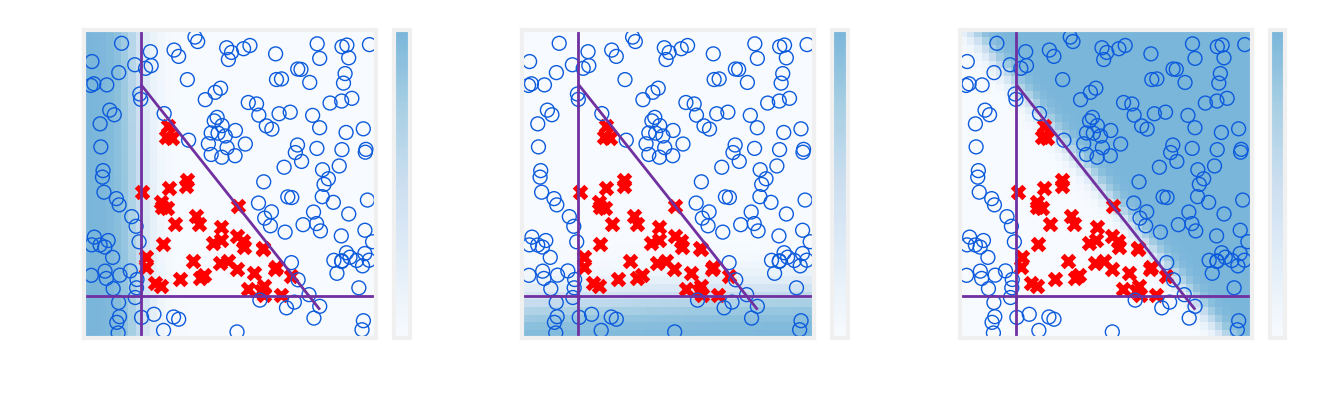

In [26]:
plt_layer(X,Y.reshape(-1,),W1,b1,norm_l)

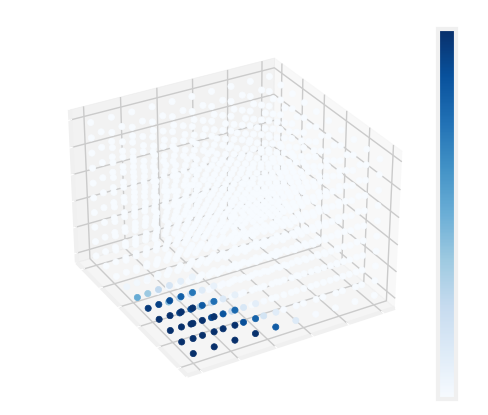

In [27]:
plt_output_unit(W2,b2)

7/7 [==============================] - 0s 2ms/step


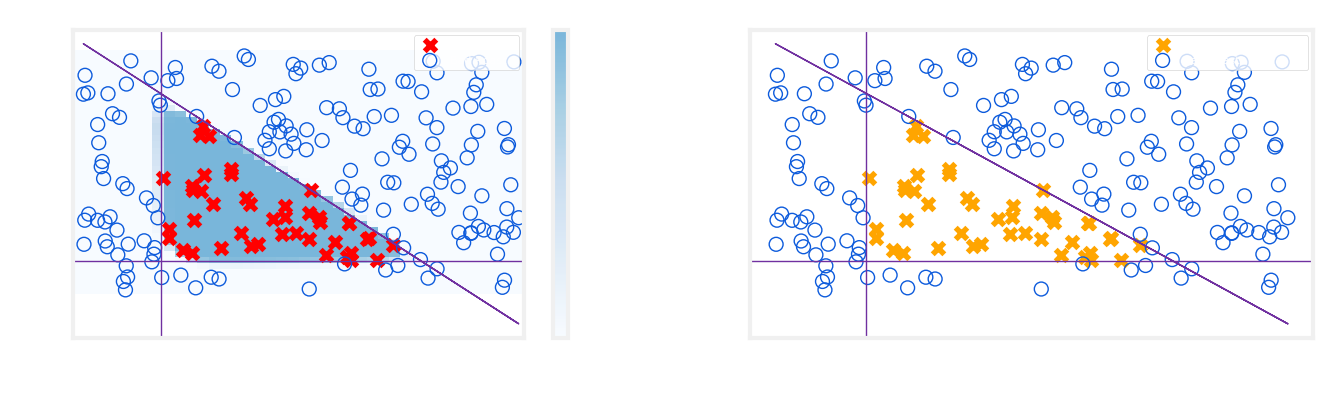

In [28]:
netf= lambda x : model.predict(norm_l(x))
plt_network(X,Y,netf)